#**Data preprocessing**

##Loading the data

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!ls '/content/sdsh2023-food_security.csv'

file_1 = '/content/sdsh2023-food_security.csv'
food_sec = pd.read_csv(file_1, encoding = 'unicode_escape')
food_sec.head()

!ls '/content/sdsh2023-market.csv'
file_2 = '/content/sdsh2023-market.csv'
market = pd.read_csv(file_2, encoding = 'unicode_escape')

!ls '/content/sdsh2023-rainfall.csv'
file_3 = '/content/sdsh2023-rainfall.csv'
rainfall = pd.read_csv(file_3, encoding = 'unicode_escape')

!ls '/content/sdsh2023-conflicts.csv'
file_4 ='/content/sdsh2023-conflicts.csv'
conflicts = pd.read_csv(file_4, encoding = 'unicode_escape')

!ls '/content/market_category_prices_usd.csv'
file_5 ='/content/market_category_prices_usd.csv'
market_final = pd.read_csv(file_5, encoding = 'unicode_escape')

/content/sdsh2023-food_security.csv
/content/sdsh2023-market.csv
/content/sdsh2023-rainfall.csv
/content/sdsh2023-conflicts.csv
/content/market_category_prices_usd.csv


##Main features of datasets

In [ ]:
print(food_sec.columns)
print(market.columns)
print(rainfall.columns)
print(conflicts.columns)

Index(['date', 'admin', 'insuff_food'], dtype='object')
Index(['year', 'month', 'admin', 'category', 'commodity', 'price', 'usdprice'], dtype='object')
Index(['year', 'month', 'admin', 'average_rainfall', 'rain_anomaly_1month',
       'rain_anomaly_3month', 'ndvi_anomaly'],
      dtype='object')
Index(['date', 'admin', 'event', 'fatalities', 'latitude', 'longitude'], dtype='object')


In [ ]:
food_sec

,date,admin,insuff_food
0,2018-07-15,Al Bayda,50.258176
1,2018-07-15,Al Dhale'e,43.484102
2,2018-07-15,Abyan,38.626821
3,2018-07-15,Al Hudaydah,24.487910
4,2018-07-15,Al Jawf,36.482308
...,...,...,...
743,2021-04-15,Sa'ada,37.555020
744,2021-04-15,Sana'a,34.675980
745,2021-04-15,Shabwah,54.883370
746,2021-04-15,Socotra,38.222380


In [ ]:
food_sec['admin'].value_counts()

Al Bayda            34
Al Dhale'e          34
Aden                34
Taizz               34
Shabwah             34
Sana'a              34
Sa'ada              34
Raymah              34
Marib               34
Lahj                34
Ibb                 34
Hajjah              34
Hadramaut           34
Dhamar              34
Amran               34
Amanat Al Asimah    34
Al Mahwit           34
Al Maharah          34
Al Jawf             34
Al Hudaydah         34
Abyan               34
Socotra             34
Name: admin, dtype: int64

In [ ]:
market

,year,month,admin,category,commodity,price,usdprice
0,2016,7,Abyan,cereals and tubers,Potatoes,263.00,1.0516
1,2016,7,Abyan,cereals and tubers,Rice (imported),400.00,1.5994
2,2016,7,Abyan,cereals and tubers,Wheat,143.00,0.5718
3,2016,7,Abyan,cereals and tubers,Wheat flour,172.00,0.6877
4,2016,7,Abyan,"meat, fish and eggs",Eggs,30.00,0.1200
...,...,...,...,...,...,...,...
37921,2021,12,Taizz,pulses and nuts,"Peas (yellow, split)",2050.00,8.1969
37922,2021,12,Taizz,vegetables and fruits,Onions,725.00,2.8989
37923,2021,12,Taizz,vegetables and fruits,Tomatoes,1375.00,5.4979
37924,2022,1,Taizz,non-food,Exchange rate (unofficial),1089.33,4.3557


In [ ]:
conflicts

,date,admin,event,fatalities,latitude,longitude,year,month,day
0,2021-10-10,Abyan,Battles,0,13.8874,45.7740,2021,10,10
1,2021-09-30,Abyan,Battles,0,13.8874,45.7740,2021,9,30
2,2021-09-29,Abyan,Battles,0,13.8874,45.7740,2021,9,29
3,2021-09-29,Abyan,Battles,0,13.8828,45.8686,2021,9,29
4,2021-09-27,Abyan,Riots,0,13.1287,45.3807,2021,9,27
...,...,...,...,...,...,...,...,...,...
46290,2018-05-03,Socotra,Strategic developments,0,12.6307,53.9058,2018,5,3
46291,2018-05-03,Socotra,Protests,0,12.6501,54.0223,2018,5,3
46292,2018-04-16,Socotra,Protests,0,12.6501,54.0223,2018,4,16
46293,2018-04-09,Socotra,Protests,0,12.6501,54.0223,2018,4,9


In [ ]:
rainfall

,year,month,admin,average_rainfall,rain_anomaly_1month,rain_anomaly_3month,ndvi_anomaly
0,2016,1,Ibb,0.280,118.332719,158.121473,95.804930
1,2016,2,Ibb,3.090,121.152328,139.637342,104.670704
2,2016,3,Ibb,12.279,124.630131,147.740928,102.284271
3,2016,4,Ibb,35.335,75.185071,96.252100,103.834220
4,2016,5,Ibb,43.525,142.937655,124.390244,123.029090
...,...,...,...,...,...,...,...
1667,2021,12,Socotra,38.143,122.562136,107.308942,88.148493
1668,2022,1,Socotra,1.040,88.457975,97.872024,101.637513
1669,2022,2,Socotra,0.087,100.479233,105.330732,98.865088
1670,2022,3,Socotra,0.389,101.099117,88.928425,98.091021


In [ ]:
market['admin'].value_counts()

Al Hudaydah         2417
Amanat Al Asimah    2376
Hajjah              2373
Aden                2197
Sa'ada              2136
Amran               2096
Hadramaut           1824
Dhamar              1815
Al Bayda            1559
Lahj                1559
Al Dhale'e          1536
Taizz               1507
Al Maharah          1472
Al Mahwit           1463
Marib               1463
Raymah              1463
Ibb                 1460
Sana'a              1457
Shabwah             1448
Al Jawf             1446
Abyan               1440
Socotra             1419
Name: admin, dtype: int64

In [ ]:
rainfall['admin'].value_counts()

Ibb                 76
Abyan               76
Raymah              76
Al Dhale'e          76
Amran               76
Al Maharah          76
Al Mahwit           76
Marib               76
Lahj                76
Aden                76
Sana'a              76
Sa'ada              76
Shabwah             76
Dhamar              76
Hadramaut           76
Al Hudaydah         76
Hajjah              76
Al Jawf             76
Taizz               76
Al Bayda            76
Amanat Al Asimah    76
Socotra             76
Name: admin, dtype: int64

In [ ]:
conflicts['admin'].value_counts()

Al Hudaydah         11213
Sa'ada               7183
Marib                5142
Taizz                4078
Al Jawf              2796
Al Dhale'e           2553
Hajjah               2392
Al Bayda             1953
Aden                 1735
Abyan                1350
Sana'a               1207
Shabwah              1122
Amanat Al Asimah      772
Lahj                  767
Hadramaut             522
Ibb                   516
Amran                 220
Dhamar                202
Socotra               202
Al Maharah            196
Al Mahwit             109
Raymah                 65
Name: admin, dtype: int64

In [ ]:
print(food_sec.info())
print(conflicts.info())
print(market.info())
print(rainfall.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         748 non-null    object 
 1   admin        748 non-null    object 
 2   insuff_food  748 non-null    float64
dtypes: float64(1), object(2)
memory usage: 17.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46295 entries, 0 to 46294
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        46295 non-null  object 
 1   admin       46295 non-null  object 
 2   event       46295 non-null  object 
 3   fatalities  46295 non-null  int64  
 4   latitude    46295 non-null  float64
 5   longitude   46295 non-null  float64
 6   year        46295 non-null  int64  
 7   month       46295 non-null  int64  
 8   day         46295 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 3.2+ MB
None
<c

## Market Data

Columns: year, month, admin (name of the region), category (of food), commodity (concrete good), price (in local currency), usdprice

In [ ]:
#creating a column with year, month and admin info to use as index
market['y-m-adm'] = market[['year', 'month', 'admin']]. apply(lambda x: '-'.join(x.astype(str).values), axis=1)

In [ ]:
print(market.describe(include='object'))
print(market.describe())

              admin  category    commodity        y-m-adm
count         37926     37926        37926          37926
unique           22         7           26           2065
top     Al Hudaydah  non-food  Wheat flour  2016-7-Dhamar
freq           2417     10495         2016             26
               year         month          price      usdprice
count  37926.000000  37926.000000   37926.000000  37926.000000
mean    2018.010679      6.687734    3142.701280     12.566111
std        2.324503      3.439362   11737.747305     46.933441
min     2009.000000      1.000000      24.000000      0.096000
25%     2017.000000      4.000000     250.000000      0.999600
50%     2018.000000      7.000000     416.937500      1.667150
75%     2020.000000     10.000000     900.000000      3.598700
max     2022.000000     12.000000  220000.000000    879.671100


In [ ]:
market_final

,y-m-adm,year,month,category_cereals and tubers,"category_meat, fish and eggs",category_miscellaneous food,category_non-food,category_oil and fats,category_pulses and nuts,category_vegetables and fruits,usdprice_cereals and tubers,"usdprice_meat, fish and eggs",usdprice_miscellaneous food,usdprice_non-food,usdprice_oil and fats,usdprice_pulses and nuts,usdprice_vegetables and fruits
0,2009-10-Aden,2009.0,10.0,105.0,0.0,0.0,0.00,0.0,0.0,0.0,0.41985,0.0,0.0,0.0000,0.0,0.0,0.0
1,2009-10-Al Hudaydah,2009.0,10.0,107.5,0.0,0.0,0.00,0.0,0.0,0.0,0.42985,0.0,0.0,0.0000,0.0,0.0,0.0
2,2009-10-Amanat Al Asimah,2009.0,10.0,95.0,0.0,0.0,0.00,0.0,0.0,0.0,0.37990,0.0,0.0,0.0000,0.0,0.0,0.0
3,2009-10-Sa'ada,2009.0,10.0,235.0,0.0,0.0,0.00,0.0,0.0,0.0,0.93965,0.0,0.0,0.0000,0.0,0.0,0.0
4,2009-10-Socotra,2009.0,10.0,125.0,0.0,0.0,0.00,0.0,0.0,0.0,0.49980,0.0,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,2022-2-Sa'ada,2022.0,2.0,0.0,0.0,0.0,601.00,0.0,0.0,0.0,0.00000,0.0,0.0,2.4031,0.0,0.0,0.0
2061,2022-2-Sana'a,2022.0,2.0,0.0,0.0,0.0,600.04,0.0,0.0,0.0,0.00000,0.0,0.0,2.3993,0.0,0.0,0.0
2062,2022-2-Shabwah,2022.0,2.0,0.0,0.0,0.0,1120.62,0.0,0.0,0.0,0.00000,0.0,0.0,4.4808,0.0,0.0,0.0
2063,2022-2-Socotra,2022.0,2.0,0.0,0.0,0.0,1112.17,0.0,0.0,0.0,0.00000,0.0,0.0,4.4470,0.0,0.0,0.0


In [ ]:
# here we aggregate data by commodity
result_df = market.groupby(['commodity', 'y-m-adm']).agg({'price': 'mean', 'usdprice': 'mean'}).reset_index()
result_df

,commodity,y-m-adm,price,usdprice
0,Beans (kidney red),2012-10-Aden,380.0,1.5194
1,Beans (kidney red),2012-10-Al Hudaydah,380.0,1.5194
2,Beans (kidney red),2012-10-Amanat Al Asimah,400.0,1.5994
3,Beans (kidney red),2012-10-Amran,340.0,1.3595
4,Beans (kidney red),2012-10-Hajjah,340.0,1.3595
...,...,...,...,...
37921,Wheat flour,2021-9-Sa'ada,340.0,1.3595
37922,Wheat flour,2021-9-Sana'a,350.0,1.3995
37923,Wheat flour,2021-9-Shabwah,600.0,2.3991
37924,Wheat flour,2021-9-Socotra,640.0,2.5590


In [ ]:
# pivot the dataframe to have a column for each commodity type
pivot_df = market.pivot_table(index='y-m-adm', columns='commodity', values=['price', 'usdprice'], aggfunc='mean')

# flatten the multi-level columns
pivot_df.columns = [f'{col[0]}_{col[1]}' for col in pivot_df.columns]

In [ ]:
# to merge 2 DFs, we need the same index column
market_final.set_index('y-m-adm', inplace=True)

In [ ]:
# market dataframe grouped by 'y-m-adm' with mean prices of each category and commodity
market_com = pd.merge(market_final, pivot_df, left_index=True, right_index=True)

In [ ]:
# rename columns
market_com.columns = [col.replace('category', 'price') for col in market_com.columns]

In [ ]:
# add mean price in each 'y-m-adm' regardless of product category and commodity
market_com = pd.merge(market_com, market.groupby('y-m-adm').agg('mean')[['price', 'usdprice']], left_index=True, right_index=True)

<ipython-input-14-ea29e60dd6de>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  market_com = pd.merge(market_com, market.groupby('y-m-adm').agg('mean')[['price', 'usdprice']], left_index=True, right_index=True)


In [ ]:
# fill NaNs with 0
market_com = market_com.fillna(0)

In [ ]:
market_all = market_com

In [ ]:
# final DF with data aggregated by year-month-admin and transformed to wide table
market_all = market_all.drop(columns=['year', 'month'])
market_all

,price_cereals and tubers,"price_meat, fish and eggs",price_miscellaneous food,price_non-food,price_oil and fats,price_pulses and nuts,price_vegetables and fruits,usdprice_cereals and tubers,"usdprice_meat, fish and eggs",usdprice_miscellaneous food,...,usdprice_Salt,usdprice_Sorghum,usdprice_Sugar,usdprice_Tomatoes,usdprice_Wage (non-qualified labour),usdprice_Wage (qualified labour),usdprice_Wheat,usdprice_Wheat flour,price,usdprice
y-m-adm,,,,,,,,,,,,,,,,,,,,,
2009-10-Aden,105.0,0.0,0.0,0.00,0.0,0.0,0.0,0.41985,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.3999,0.4398,105.00,0.41985
2009-10-Al Hudaydah,107.5,0.0,0.0,0.00,0.0,0.0,0.0,0.42985,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.3799,0.4798,107.50,0.42985
2009-10-Amanat Al Asimah,95.0,0.0,0.0,0.00,0.0,0.0,0.0,0.37990,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.3599,0.3999,95.00,0.37990
2009-10-Sa'ada,235.0,0.0,0.0,0.00,0.0,0.0,0.0,0.93965,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.8797,0.9996,235.00,0.93965
2009-10-Socotra,125.0,0.0,0.0,0.00,0.0,0.0,0.0,0.49980,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.4798,0.5198,125.00,0.49980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-2-Sa'ada,0.0,0.0,0.0,601.00,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,601.00,2.40310
2022-2-Sana'a,0.0,0.0,0.0,600.04,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,600.04,2.39930
2022-2-Shabwah,0.0,0.0,0.0,1120.62,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,1120.62,4.48080


In [ ]:
market_all.to_csv('/content/market_all.csv')

## Conflicts Data

Columns: date, admin, event (type of conflict), fatalities, latitude, longitude

In [ ]:
# separate the date column to estract year, month and day to use later to create y-m-adm column
conflicts[['year', 'month', 'day']] = conflicts['date'].str.split('-', expand=True)
conflicts

,date,admin,event,fatalities,latitude,longitude,year,month,day
0,2021-10-10,Abyan,Battles,0,13.8874,45.7740,2021,10,10
1,2021-09-30,Abyan,Battles,0,13.8874,45.7740,2021,09,30
2,2021-09-29,Abyan,Battles,0,13.8874,45.7740,2021,09,29
3,2021-09-29,Abyan,Battles,0,13.8828,45.8686,2021,09,29
4,2021-09-27,Abyan,Riots,0,13.1287,45.3807,2021,09,27
...,...,...,...,...,...,...,...,...,...
46290,2018-05-03,Socotra,Strategic developments,0,12.6307,53.9058,2018,05,03
46291,2018-05-03,Socotra,Protests,0,12.6501,54.0223,2018,05,03
46292,2018-04-16,Socotra,Protests,0,12.6501,54.0223,2018,04,16
46293,2018-04-09,Socotra,Protests,0,12.6501,54.0223,2018,04,09


In [ ]:
conflicts['year'].value_counts()

2019    11838
2020    11828
2018    11407
2021     8750
2022     2472
Name: year, dtype: int64

In [ ]:
conflicts['year'] = pd.to_numeric(conflicts['year'])
conflicts['month'] = pd.to_numeric(conflicts['month'])
conflicts['day'] = pd.to_numeric(conflicts['day'])

In [ ]:
# add 'y-m-adm' column
conflicts['y-m-adm'] = conflicts['year'].astype(str) + '-' + conflicts['month'].astype(str) + '-' + conflicts['admin']

In [ ]:
# add count of every type of event
event_counts = conflicts.groupby('y-m-adm')['event'].value_counts().unstack(fill_value=0)

In [ ]:
# add column with sum of fatalities in conflict
event_counts['fatalities'] = conflicts.groupby('y-m-adm').sum()['fatalities']

<ipython-input-22-cb7def2e43cd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  event_counts['fatalities'] = conflicts.groupby('y-m-adm').sum()['fatalities']


In [ ]:
conflicts_all = event_counts

In [ ]:
conflicts_all

event,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,fatalities
y-m-adm,,,,,,,
2018-1-Abyan,1,6,0,0,0,1,0
2018-1-Aden,19,3,2,1,10,4,44
2018-1-Al Bayda,52,45,0,0,0,0,403
2018-1-Al Dhale'e,0,5,0,0,0,1,19
2018-1-Al Hudaydah,13,24,0,0,1,0,208
...,...,...,...,...,...,...,...
2022-4-Sa'ada,1,18,0,0,0,0,6
2022-4-Sana'a,1,1,0,0,0,0,2
2022-4-Shabwah,1,0,1,1,3,0,0


## Rainfall Data

Columns: year, month, admin, average_rainfall, rain_anomaly_1month, rain_anomaly_3month, ndvi_anomaly

In [ ]:
# add 'y-m-adm' column
rainfall['y-m-adm'] = rainfall['year'].astype(str) + '-' + rainfall['month'].astype(str) + '-' + rainfall['admin']

In [ ]:
rainfall

,year,month,admin,average_rainfall,rain_anomaly_1month,rain_anomaly_3month,ndvi_anomaly,y-m-adm
0,2016,1,Ibb,0.280,118.332719,158.121473,95.804930,2016-1-Ibb
1,2016,2,Ibb,3.090,121.152328,139.637342,104.670704,2016-2-Ibb
2,2016,3,Ibb,12.279,124.630131,147.740928,102.284271,2016-3-Ibb
3,2016,4,Ibb,35.335,75.185071,96.252100,103.834220,2016-4-Ibb
4,2016,5,Ibb,43.525,142.937655,124.390244,123.029090,2016-5-Ibb
...,...,...,...,...,...,...,...,...
1667,2021,12,Socotra,38.143,122.562136,107.308942,88.148493,2021-12-Socotra
1668,2022,1,Socotra,1.040,88.457975,97.872024,101.637513,2022-1-Socotra
1669,2022,2,Socotra,0.087,100.479233,105.330732,98.865088,2022-2-Socotra
1670,2022,3,Socotra,0.389,101.099117,88.928425,98.091021,2022-3-Socotra


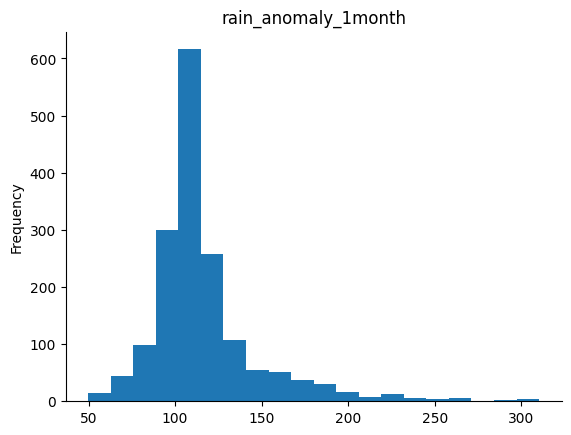

In [ ]:
from matplotlib import pyplot as plt
rainfall['rain_anomaly_1month'].plot(kind='hist', bins=20, title='rain_anomaly_1month')
plt.gca().spines[['top', 'right',]].set_visible(False)

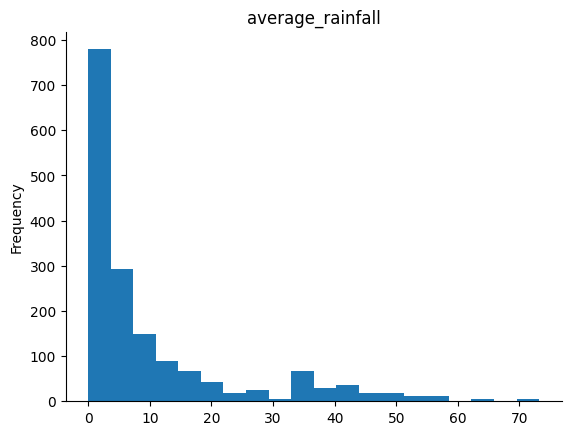

In [ ]:
from matplotlib import pyplot as plt
rainfall['average_rainfall'].plot(kind='hist', bins=20, title='average_rainfall')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# aggregate the data by y-m-adm to median rainfall and rainfall anomalies
rainfall_all = rainfall.groupby('y-m-adm').median().drop(columns=['year', 'month'])

<ipython-input-27-543c208f2994>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rainfall_all = rainfall.groupby('y-m-adm').median().drop(columns=['year', 'month'])


In [ ]:
rainfall_all

,average_rainfall,rain_anomaly_1month,rain_anomaly_3month,ndvi_anomaly
y-m-adm,,,,
2016-1-Abyan,1.014,111.810602,131.662963,94.706220
2016-1-Aden,0.000,116.666667,115.979144,95.789482
2016-1-Al Bayda,1.048,118.457944,126.578865,97.733726
2016-1-Al Dhale'e,0.000,112.817280,142.148489,99.144394
2016-1-Al Hudaydah,1.864,114.187714,136.684202,89.051869
...,...,...,...,...
2022-4-Sa'ada,12.517,58.460798,72.243743,103.970115
2022-4-Sana'a,9.604,59.680432,73.884668,105.618898
2022-4-Shabwah,2.114,86.327595,97.803237,105.855981


## Merging all the data

Columns: date, admin, insuff_food (level of food deficiency)

In [ ]:
# split the date into 3 columns with year, month,
food_sec[['year', 'month', 'day']] = food_sec['date'].str.split('-', expand=True)

# make it numeric
food_sec['year'] = pd.to_numeric(food_sec['year'])
food_sec['month'] = pd.to_numeric(food_sec['month'])
food_sec['day'] = pd.to_numeric(food_sec['day'])

# add y-m-adm column
food_sec['y-m-adm'] = food_sec['year'].astype(str) + '-' + food_sec['month'].astype(str) + '-' + food_sec['admin']
food_sec

,date,admin,insuff_food,year,month,day,y-m-adm
0,2018-07-15,Al Bayda,50.258176,2018,7,15,2018-7-Al Bayda
1,2018-07-15,Al Dhale'e,43.484102,2018,7,15,2018-7-Al Dhale'e
2,2018-07-15,Abyan,38.626821,2018,7,15,2018-7-Abyan
3,2018-07-15,Al Hudaydah,24.487910,2018,7,15,2018-7-Al Hudaydah
4,2018-07-15,Al Jawf,36.482308,2018,7,15,2018-7-Al Jawf
...,...,...,...,...,...,...,...
743,2021-04-15,Sa'ada,37.555020,2021,4,15,2021-4-Sa'ada
744,2021-04-15,Sana'a,34.675980,2021,4,15,2021-4-Sana'a
745,2021-04-15,Shabwah,54.883370,2021,4,15,2021-4-Shabwah
746,2021-04-15,Socotra,38.222380,2021,4,15,2021-4-Socotra


In [ ]:
# set y-m-adm column as index
food_sec.set_index('y-m-adm', inplace=True)

In [ ]:
# merge all datasets
food_market = pd.merge(food_sec, market_all, left_index=True, right_index=True)
market_rain = pd.merge(food_market, rainfall_all, left_index=True, right_index=True)

In [ ]:
base_data = pd.merge(market_rain, conflicts_all, how='left', left_index=True, right_index=True)

In [ ]:
base_data = base_data.drop(columns=['day'])

In [ ]:
base_data = base_data.drop(columns=['date'])

This is our train dataset.

## Test Data

Vectors for test data

In [ ]:
years = [2021, 2022]
month = [5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4]
regions = food_sec['admin'].unique()

y_m_adm = []

for m in month:
  for r in regions:
    if m > 4:
      y_m_adm.append(f'{2021}-{m}-{r}')
    else:
      y_m_adm.append(f'{2022}-{m}-{r}')

In [ ]:
date = []
month_str = ['05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03', '04']

for m in month_str:
  for r in regions:
    if int(m) < 4:
      date.append(f'{2021}-{m}-15')
    else:
      date.append((f'{2022}-{m}-15'))

In [ ]:
date[1:10]

['2022-05-15',
 '2022-05-15',
 '2022-05-15',
 '2022-05-15',
 '2022-05-15',
 '2022-05-15',
 '2022-05-15',
 '2022-05-15',
 '2022-05-15']

In [ ]:
food_sec_test = pd.DataFrame({'date': date,
                              'y-m-adm': y_m_adm})

In [ ]:
food_sec_test[['year', 'month', 'admin']] = food_sec_test['y-m-adm'].str.split(pat='-', expand=True)

In [ ]:
food_sec_test.set_index('y-m-adm', inplace=True)

In [ ]:
food_sec_test

,date,y-m-adm,year,month,admin
0,2022-05-15,2021-5-Al Bayda,2021,5,Al Bayda
1,2022-05-15,2021-5-Al Dhale'e,2021,5,Al Dhale'e
2,2022-05-15,2021-5-Abyan,2021,5,Abyan
3,2022-05-15,2021-5-Al Hudaydah,2021,5,Al Hudaydah
4,2022-05-15,2021-5-Al Jawf,2021,5,Al Jawf
...,...,...,...,...,...
259,2022-04-15,2022-4-Sana'a,2022,4,Sana'a
260,2022-04-15,2022-4-Shabwah,2022,4,Shabwah
261,2022-04-15,2022-4-Taizz,2022,4,Taizz
262,2022-04-15,2022-4-Aden,2022,4,Aden


Now we have to merge everything for the test dataset

In [ ]:
# merge
food_market_test = pd.merge(food_sec_test, market_all, how='left', left_index=True, right_index=True)
market_rain_test = pd.merge(food_market_test, rainfall_all, how='left', left_index=True, right_index=True)


In [ ]:
base_data_test = pd.merge(market_rain_test, conflicts_all, how='left', left_index=True, right_index=True)

In [ ]:
base_data_test # to predict in final model

,date,year,month,admin,price_cereals and tubers,"price_meat, fish and eggs",price_miscellaneous food,price_non-food,price_oil and fats,price_pulses and nuts,...,rain_anomaly_1month,rain_anomaly_3month,ndvi_anomaly,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,fatalities
y-m-adm,,,,,,,,,,,,,,,,,,,,,
2021-5-Al Bayda,2022-05-15,2021,5,Al Bayda,73.928571,6304.285714,39.285714,547.357143,152.714286,100.714286,...,139.259190,104.182179,115.362321,10.0,13.0,2.0,0.0,1.0,1.0,48.0
2021-5-Al Dhale'e,2022-05-15,2021,5,Al Dhale'e,96.057143,7149.428571,51.428571,666.380952,187.142857,119.285714,...,147.519506,112.488131,118.280774,15.0,10.0,4.0,0.0,0.0,2.0,98.0
2021-5-Abyan,2022-05-15,2021,5,Abyan,85.714286,4721.000000,57.142857,433.333333,176.142857,139.285714,...,167.462770,143.299987,117.363530,4.0,4.0,4.0,0.0,2.0,3.0,4.0
2021-5-Al Hudaydah,2022-05-15,2021,5,Al Hudaydah,59.119048,2433.571429,39.285714,487.380952,128.571429,97.857143,...,119.679144,119.333767,110.265909,43.0,121.0,2.0,0.0,3.0,1.0,336.0
2021-5-Al Jawf,2022-05-15,2021,5,Al Jawf,73.571429,2505.857143,57.142857,561.904762,111.142857,119.047619,...,121.741314,103.391865,102.065494,16.0,19.0,1.0,0.0,1.0,0.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-4-Sana'a,2022-04-15,2022,4,Sana'a,NaN,NaN,NaN,NaN,NaN,NaN,...,59.680432,73.884668,105.618898,1.0,1.0,0.0,0.0,0.0,0.0,2.0
2022-4-Shabwah,2022-04-15,2022,4,Shabwah,NaN,NaN,NaN,NaN,NaN,NaN,...,86.327595,97.803237,105.855981,1.0,0.0,1.0,1.0,3.0,0.0,0.0
2022-4-Taizz,2022-04-15,2022,4,Taizz,NaN,NaN,NaN,NaN,NaN,NaN,...,84.760289,104.235811,104.448351,15.0,29.0,1.0,0.0,0.0,1.0,22.0


In [ ]:
base_data_test.shape

(264, 83)

In [ ]:
col_to_fill = ['price_cereals and tubers',
       'price_meat, fish and eggs', 'price_miscellaneous food',
       'price_non-food', 'price_oil and fats', 'price_pulses and nuts',
       'price_vegetables and fruits', 'usdprice_cereals and tubers',
       'usdprice_meat, fish and eggs', 'usdprice_miscellaneous food',
       'usdprice_non-food', 'usdprice_oil and fats',
       'usdprice_pulses and nuts', 'usdprice_vegetables and fruits',
       'price_Beans (kidney red)', 'price_Beans (white)', 'price_Eggs',
       'price_Exchange rate (unofficial)', 'price_Fuel (diesel)',
       'price_Fuel (gas)', 'price_Fuel (petrol-gasoline)', 'price_Lentils',
       'price_Livestock (sheep, two-year-old male)', 'price_Meat (chicken)',
       'price_Meat (mutton)', 'price_Millet', 'price_Milling cost (wheat)',
       'price_Oil (vegetable)', 'price_Onions', 'price_Peas (yellow, split)',
       'price_Potatoes', 'price_Rice (imported)', 'price_Salt',
       'price_Sorghum', 'price_Sugar', 'price_Tomatoes',
       'price_Wage (non-qualified labour)', 'price_Wage (qualified labour)',
       'price_Wheat', 'price_Wheat flour', 'usdprice_Beans (kidney red)',
       'usdprice_Beans (white)', 'usdprice_Eggs',
       'usdprice_Exchange rate (unofficial)', 'usdprice_Fuel (diesel)',
       'usdprice_Fuel (gas)', 'usdprice_Fuel (petrol-gasoline)',
       'usdprice_Lentils', 'usdprice_Livestock (sheep, two-year-old male)',
       'usdprice_Meat (chicken)', 'usdprice_Meat (mutton)', 'usdprice_Millet',
       'usdprice_Milling cost (wheat)', 'usdprice_Oil (vegetable)',
       'usdprice_Onions', 'usdprice_Peas (yellow, split)', 'usdprice_Potatoes',
       'usdprice_Rice (imported)', 'usdprice_Salt', 'usdprice_Sorghum',
       'usdprice_Sugar', 'usdprice_Tomatoes',
       'usdprice_Wage (non-qualified labour)',
       'usdprice_Wage (qualified labour)', 'usdprice_Wheat',
       'usdprice_Wheat flour', 'price', 'usdprice', 'average_rainfall',
       'rain_anomaly_1month', 'rain_anomaly_3month', 'ndvi_anomaly', 'Battles',
       'Explosions/Remote violence', 'Protests', 'Riots',
       'Strategic developments', 'Violence against civilians', 'fatalities']

In [ ]:
# fill NaNs with mean over the column
for col in col_to_fill:
  base_data_test[col].fillna(int(base_data_test[col].mean()), inplace=True)

In [ ]:
# our TRUE TEST SET
base_data_test = base_data_test.drop(columns=['date'])

#**Model Selection**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

from sklearn.metrics import r2_score
import numpy as np

##Linear Regression

In [ ]:
base_data.columns

Index(['admin', 'insuff_food', 'year', 'month', 'price_cereals and tubers',
       'price_meat, fish and eggs', 'price_miscellaneous food',
       'price_non-food', 'price_oil and fats', 'price_pulses and nuts',
       'price_vegetables and fruits', 'usdprice_cereals and tubers',
       'usdprice_meat, fish and eggs', 'usdprice_miscellaneous food',
       'usdprice_non-food', 'usdprice_oil and fats',
       'usdprice_pulses and nuts', 'usdprice_vegetables and fruits',
       'price_Beans (kidney red)', 'price_Beans (white)', 'price_Eggs',
       'price_Exchange rate (unofficial)', 'price_Fuel (diesel)',
       'price_Fuel (gas)', 'price_Fuel (petrol-gasoline)', 'price_Lentils',
       'price_Livestock (sheep, two-year-old male)', 'price_Meat (chicken)',
       'price_Meat (mutton)', 'price_Millet', 'price_Milling cost (wheat)',
       'price_Oil (vegetable)', 'price_Onions', 'price_Peas (yellow, split)',
       'price_Potatoes', 'price_Rice (imported)', 'price_Salt',
       'price_Sorg

In [ ]:
X = base_data.drop(columns=['insuff_food']).fillna(0)
y = base_data['insuff_food']

X_dum = pd.get_dummies(X, columns=['admin'], drop_first=True)

In [ ]:
X_dum.shape

(748, 102)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state = 90)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

pred_y = reg.predict(X_test)
r2_score(y_test, pred_y)

0.6621204953732289

## Gradient Boosting Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

import pandas  as pd
import numpy   as np
import xgboost as xgb

In [ ]:
regressor=xgb.XGBRegressor(eval_metric='rmsle')

In [ ]:
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5, verbose=3).fit(X_train, y_train)

print("The best hyperparameters are ", search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.628 total time=   1.8s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.611 total time=   1.7s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.649 total time=   1.8s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.601 total time=   1.8s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=500;, score=0.665 total time=   2.0s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=600;, score=0.628 total time=   6.4s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=600;, score=0.613 total time=   2.3s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=600;, score=0.653 total time=   2.3s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=600;, score=0.611 total time=   2.3s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=600;, score=0.67

In [ ]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.015, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:
r2_score(y_test, predictions)

0.7187880907313358

So far the best model is gradient boosting